In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from nycflights13 import flights

In [3]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [6]:
flights.dropna(inplace=True)

In [7]:
df = flights

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute    

In [10]:
df.arr_delay.mean()

6.89537675731489

$H_0: arrDelay <= 8$

$H_1: arrDelay > 8$

In [18]:
sample = []
for i in range(1000):
    temp = df.sample(10000,replace=True)
    sample.append(temp.arr_delay.mean())

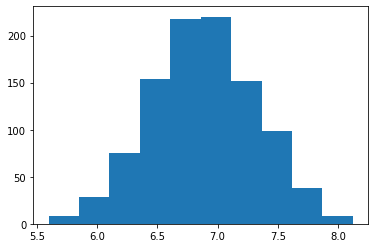

In [23]:
plt.hist(sample);

In [26]:
np.array(sample).std()

0.4332883650022927

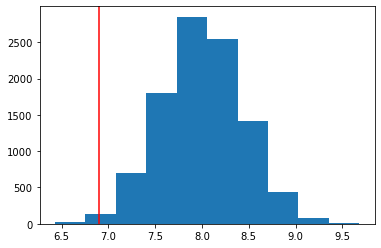

In [28]:
normal_sim = np.random.normal(loc=8,scale=np.array(sample).std(),size=10000)
plt.hist(normal_sim)
plt.axvline(x=df.arr_delay.mean(),c='r');

In [29]:
(normal_sim>np.array(sample).mean()).mean()

0.9943

$H_0: arrDelay \geq 8$

$H_1: arrDelay < 8$

In [30]:
(normal_sim<np.array(sample).mean()).mean()

0.0057

$H_0: arrDelay \leq 6.8$

$H_1: arrDelay > 6.8$

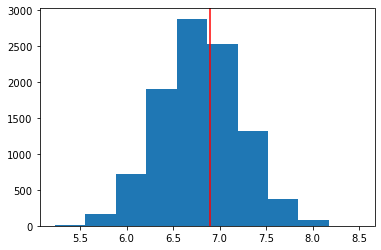

In [31]:
normal_sim = np.random.normal(loc=6.8,scale=np.array(sample).std(),size=10000)
plt.hist(normal_sim)
observed = df.arr_delay.mean()
plt.axvline(x=observed,c='r');

In [32]:
(normal_sim>np.array(sample).mean()).mean()

0.4192

# Using Z-score

In [33]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
null_success = 
alt_success  = 

zstat, p_value = sm.stats.proportions_ztest(count=, nobs=, simulolate)

In [ ]:
z = (observed - np.array(p_diffs).mean())/np.array(p_diffs).std()